# Código Python - Trabalho 2

## *Imports* estáticos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

## Declaração de variáveis repetidas

In [3]:
random_state = 42
alpha = 0.05
test_size = 0.3

## 4.1  Análise Exploratória de Dados
### 4.1.1   Leitura do ficheiro

In [4]:
dados = pd.read_csv('../../dados/AIRPOL_data.csv', delimiter=";", header=0, decimal=',')
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']).rename(columns={"Value":"Premature_Deaths","Outcome":"Disease"})
#dados = dados[dados.Country != 'All Countries']
#dados.sort_values(by=['Value'])

### 4.1.4. Agrupamento dos dados em zonas

In [5]:
soutEuDados = dados[dados['Country'].isin(['Greece', 'Spain', 'Italy', 'Portugal'])]
soutEuDados

,Country,NUTS_Code,Air_Pollutant,Disease,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Premature_Deaths
1274,Greece,EL643,PM2.5,Chronic obstructive pulmonary disease,15469.0,243.2,7.6,0.0
1548,Portugal,PT16H,PM2.5,Chronic obstructive pulmonary disease,67529.0,1098.3,5.8,0.0
1552,Spain,ES417,PM2.5,Chronic obstructive pulmonary disease,72931.0,610.6,5.2,0.0
3094,Greece,EL412,PM2.5,Chronic obstructive pulmonary disease,26702.0,232.2,9.0,1.0
3096,Greece,EL621,PM2.5,Chronic obstructive pulmonary disease,27037.0,184.4,9.2,1.0
...,...,...,...,...,...,...,...,...
47743,Italy,IT,PM2.5,Chronic obstructive pulmonary disease,45750394.0,169657.2,11.7,4166.0
47763,Italy,IT,PM2.5,Lung cancer,45750394.0,169657.2,11.7,5373.0
47780,Italy,IT,PM2.5,Diabetes Mellitus,45750394.0,169657.2,11.7,9805.0
47787,Italy,IT,PM2.5,Ischemic heart disease,45750394.0,169657.2,11.7,10789.0


### 4.2.3 K-Fold cross validation

#### Preparação dos valores

In [6]:
goalAttrib = 'Premature_Deaths'
features = list(dados.columns[0:8])
numericFeatures = features[4:]
scaler = StandardScaler()

X = soutEuDados[numericFeatures].drop(columns=[goalAttrib])
y = soutEuDados[goalAttrib]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)

print("Stratified division of goal attribute:")
print(y_train.value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print(y_test.value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Stratified division of goal attribute:
Premature_Deaths
0.0       13.5%
1.0        3.3%
2.0        2.6%
3.0        2.4%
4.0        2.1%
          ...  
2177.0     0.0%
4789.0     0.0%
589.0      0.0%
1938.0     0.0%
2451.0     0.0%
Name: proportion, Length: 1103, dtype: object
Premature_Deaths
0.0       13.3%
1.0        3.9%
2.0        2.8%
3.0        2.7%
4.0        2.1%
          ...  
1357.0     0.0%
6617.0     0.0%
3365.0     0.0%
6877.0     0.0%
325.0      0.0%
Name: proportion, Length: 678, dtype: object


#### Otimização dos parâmetros da Árvore de regressão e visualização

In [7]:
results = []
for max_depth in range(2, 11):
    for min_samples_split in [2, 5, 10]:
        for min_samples_leaf in [1, 2, 4]:
            dt = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=random_state
            )
            dt.fit(X_train_scaled, y_train)
            y_pred = dt.predict(X_test_scaled)

            result = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'mse': mean_squared_error(y_test, y_pred),
                'r2': r2_score(y_test, y_pred)
            }
            results.append(result)

resdf = pd.DataFrame(results)
resdf = resdf.sort_values(by='r2', ascending=False)
resdf

,max_depth,min_samples_split,min_samples_leaf,mse,r2
66,9,5,1,4.240477e+06,0.486007
64,9,2,2,4.241367e+06,0.485899
67,9,5,2,4.241379e+06,0.485897
63,9,2,1,4.241646e+06,0.485865
58,8,5,2,4.248278e+06,0.485061
...,...,...,...,...,...
4,2,5,2,5.298347e+06,0.357781
5,2,5,4,5.298347e+06,0.357781
6,2,10,1,5.298347e+06,0.357781
7,2,10,2,5.298347e+06,0.357781


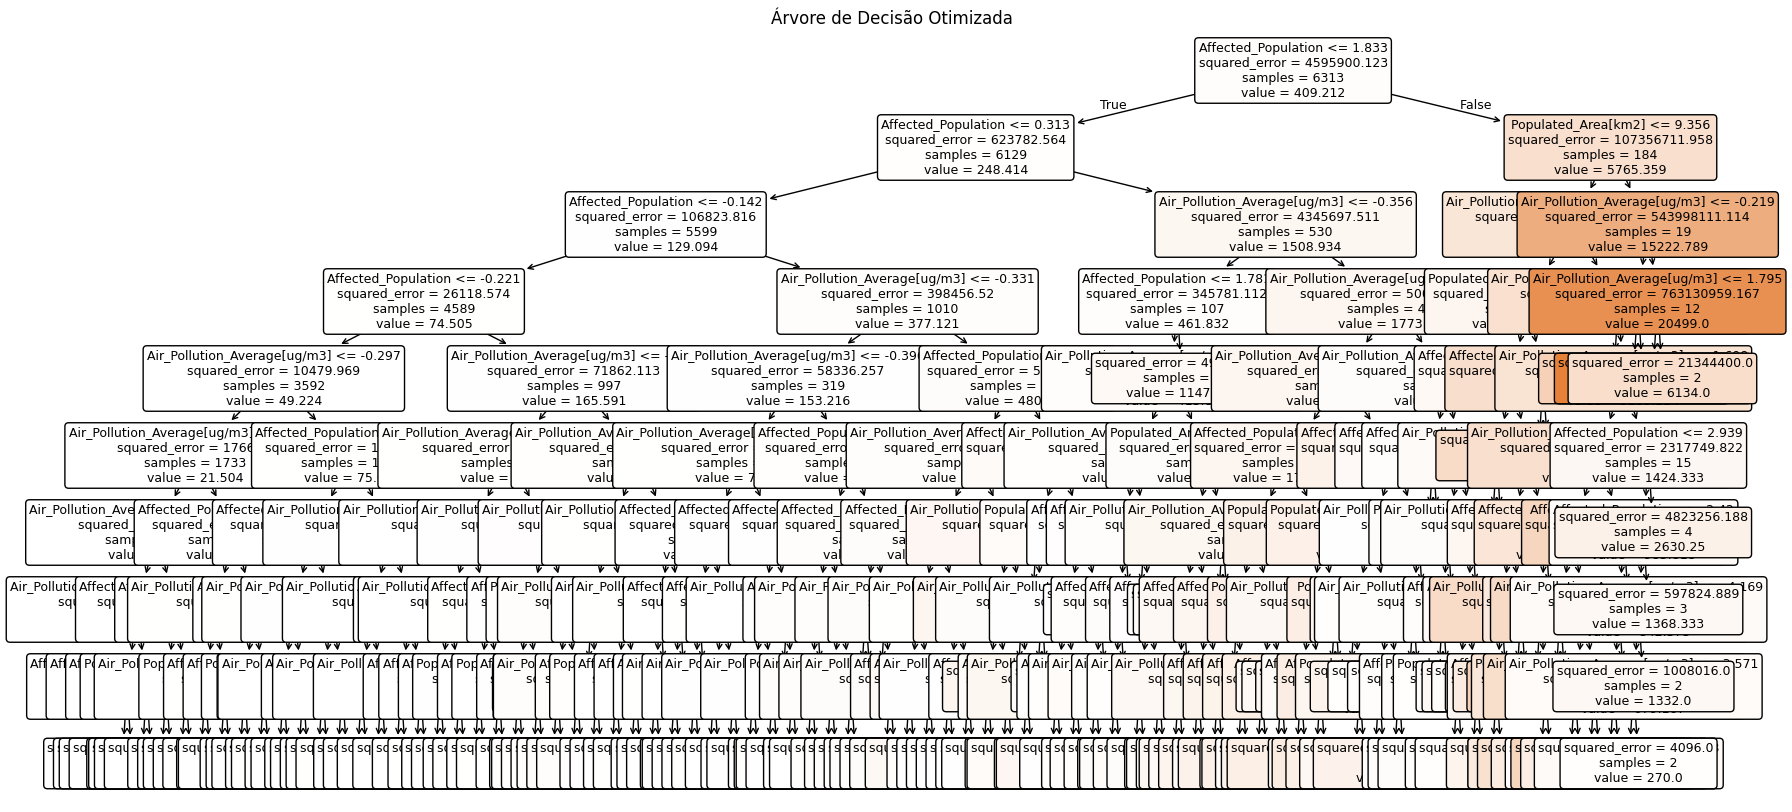

In [8]:
best_tree = DecisionTreeRegressor(
    max_depth=9,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=random_state
)
best_tree.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_tree,
    filled=True,
    feature_names=X_train.columns,
    rounded=True,
    fontsize=9
)
plt.title("Árvore de Decisão Otimizada")
plt.show()

#### Otimização do kernel SVM

In [ ]:
kernels = ['linear', 'rbf', 'poly']
results = []

for kernel in kernels:
    # initialize and train SVM
    svm_model = SVR(kernel=kernel)
    rmse_scores = cross_val_score(svm_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=20)
    # store results
    results.append({
        "model": kernel,
        "rmse": np.mean(rmse_scores),
        "std": np.std(rmse_scores)
    })

resdf = pd.DataFrame(results)
resdf = resdf.sort_values(by='rmse', ascending=True)
resdf

,model,rmse,std
1,rbf,-4.628436e+06,5.974894e+06
2,poly,-4.307128e+06,5.161684e+06
0,linear,-3.990279e+06,5.299262e+06


Com isto, vemos que o melhor kernel é o "rbf"
#### Otimização da configuração da rede neuronal

In [9]:
def regressmodelevaluation(name_model, y_test, y_pred):
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mse), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    mape = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    return pd.Series({'Model': name_model, 'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2, 'mape': mape})

In [ ]:
results = []
ncols = X_train.shape[1]

for solv in ['lbfgs', 'sgd', 'adam']:
    for nodes in range(2,ncols):
        mlp = MLPRegressor(hidden_layer_sizes=nodes,
                           activation='tanh',
                           solver=solv,
                           max_iter=1000,
                           learning_rate='adaptive',
                           early_stopping=True,
                           random_state=random_state)
        mlp.fit(X_train_scaled, y_train)

        y_pred = mlp.predict(X_test_scaled)
        result = regressmodelevaluation(f'{solv} {nodes}', y_test, y_pred)
        results.append(result)
    
resdf = pd.DataFrame(results)
resdf

,Model,mae,mse,rmse,r2,mape
0,lbfgs 2,593.941,7495146.109,2737.726,0.092,1.297402e+17
1,sgd 2,477.940,7708266.922,2776.377,0.066,1.020709e+17
2,adam 2,453.225,8455178.998,2907.779,-0.025,2.439093e+14


In [10]:
results = []
for solv in ['lbfgs', 'sgd', 'adam']:
    for nodes1 in range(2,6):
        for nodes2 in range(3,7):
            mlp = MLPRegressor(hidden_layer_sizes=(nodes1, nodes2),
                        activation='tanh',
                        solver=solv,
                        max_iter=1000,
                        learning_rate='adaptive',
                        early_stopping=True,
                        random_state=random_state)
            mlp.fit(X_train_scaled, y_train)

            y_pred = mlp.predict(X_test_scaled)
            result = regressmodelevaluation(f'{solv} {nodes1} {nodes2}', y_test, y_pred)
            results.append(result)
    
resdf = pd.DataFrame(results)
resdf.sort_values(by='r2', ascending=False)

,Model,mae,mse,rmse,r2,mape
10,lbfgs 4 5,564.981,6634056.208,2575.666,0.196,2.002603e+17
7,lbfgs 3 6,528.174,6792455.926,2606.234,0.177,1.100848e+17
27,sgd 4 6,500.758,6942985.060,2634.954,0.158,1.138653e+17
4,lbfgs 3 3,570.899,7306377.619,2703.031,0.114,2.066506e+17
3,lbfgs 2 6,547.130,7318503.798,2705.273,0.113,1.492466e+17
18,sgd 2 5,511.142,7349924.150,2711.074,0.109,9.364126e+16
9,lbfgs 4 4,543.044,7430539.571,2725.902,0.099,1.430968e+17
2,lbfgs 2 5,524.031,7442893.842,2728.167,0.098,7.579495e+16
20,sgd 3 3,514.020,7504409.096,2739.418,0.090,1.130998e+17
21,sgd 3 4,539.612,7508277.399,2740.124,0.090,1.383509e+17


Com isto, vemos que o melhor modelo é o lbfgs 4 5
#### k-fold cross validation

In [19]:
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

models = []
models.append(('rgr', LinearRegression()))
models.append(('dtr', DecisionTreeRegressor(
        max_depth=9,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=random_state
    )))
models.append(('net', MLPRegressor(hidden_layer_sizes=(4, 5),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=1000,
                        learning_rate='adaptive',
                        early_stopping=True,
                        random_state=random_state)))
models.append(('svm', make_pipeline(StandardScaler(),SVR(kernel='rbf'))))

lstresults = []

for name, model in models:
    # RMSE
    mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = (-mse_scores) ** 0.5

    # MAE
    mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores

    # R2
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    lstresults.append(pd.Series({
        'model': name,
        'mean_RMSE': round(np.mean(rmse_scores), 3),
        'std_RMSE': round(np.std(rmse_scores), 3),
        'mean_MAE': round(np.mean(mae_scores), 3),
        'std_MAE': round(np.std(mae_scores), 3),
        'mean_R2': round(np.mean(r2_scores), 3),
        'std_R2': round(np.std(r2_scores), 3)
    }))
    print(f"Model {name} done")

resdf = pd.DataFrame(lstresults)
resdf.sort_values(by='mean_R2', ascending=False)

Model rgr done
Model dtr done
Model net done
Model svm done


,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_R2,std_R2
1,dtr,1878.710,262.839,406.658,14.255,0.320,0.144
0,rgr,1973.718,352.331,447.851,19.227,0.260,0.149
2,net,2332.775,501.497,618.084,26.906,-0.000,0.000
3,svm,2338.165,501.445,390.154,30.536,-0.005,0.003
